In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
df =pd.read_csv("../Dataset/india_cases.csv",index_col='Date',parse_dates=True)

C:\Users\sneha\AppData\Local\Temp\ipykernel_24852\2361962758.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df =pd.read_csv("../Dataset/india_cases.csv",index_col='Date',parse_dates=True)


<Axes: xlabel='Date'>

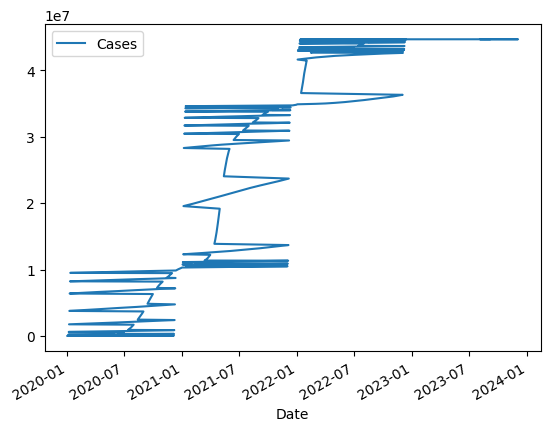

In [179]:
df.plot()

In [180]:
dfr=df.resample('D').ffill()

In [181]:
dfr.head()

,Cases
Date,
2020-01-02,1
2020-01-03,3
2020-01-04,1998
2020-01-05,37257
2020-01-06,198370


In [182]:
dfr.index.freq='D'

<Axes: xlabel='Date'>

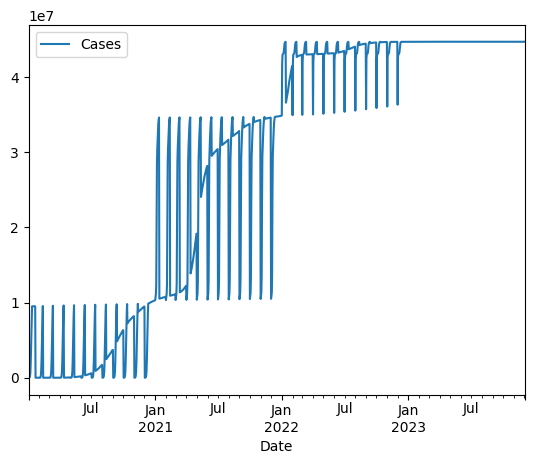

In [183]:
dfr.plot()

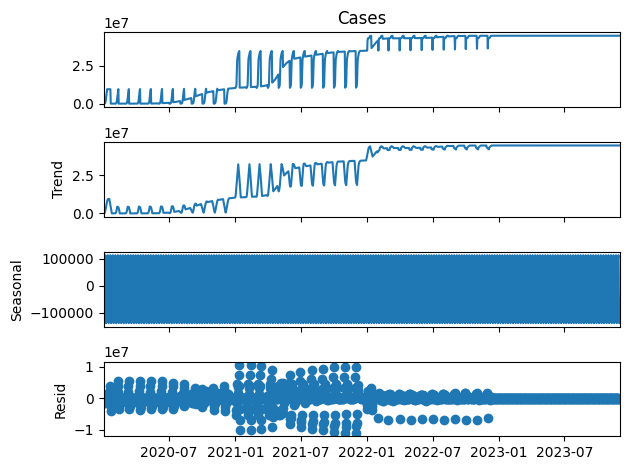

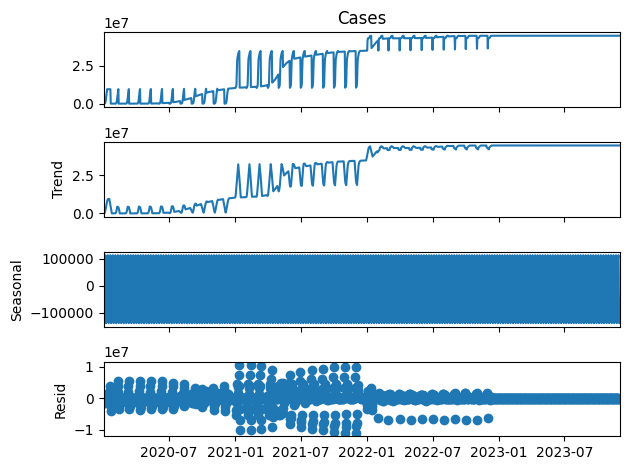

In [184]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(dfr['Cases'])
results.plot()
     

In [185]:
len(dfr)

1431

In [186]:
80*1431

114480

In [187]:
0.8*1431

1144.8

In [188]:
train = dfr.iloc[:1144]
test = dfr.iloc[1144:]
     

In [189]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [190]:
dfr.head(),dfr.tail()

(             Cases
 Date              
 2020-01-02       1
 2020-01-03       3
 2020-01-04    1998
 2020-01-05   37257
 2020-01-06  198370,
                Cases
 Date                
 2023-11-28  44685219
 2023-11-29  44685219
 2023-11-30  44685219
 2023-12-01  44681981
 2023-12-02  44685425)

In [191]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [192]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [193]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=32)

     

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [195]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [196]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [197]:
model.fit(generator,epochs=100)

Epoch 1/100


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3907
Epoch 2/100
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0298

C:\Users\sneha\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082  
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080
Epoch 15/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069
Epoch 16/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081
Epoch 17/100


In [198]:
last_train_batch = scaled_train[-12:]

In [199]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [200]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


array([[1.0206457]], dtype=float32)

In [201]:
scaled_test[0]

array([0.99995245])

In [202]:
def functionforprediction(testp):
    test_predictions = []

    first_eval_batch = scaled_train[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(testp)):
    
    # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
        test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

    return test_predictions

In [203]:
test_predictions=functionforprediction(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

In [204]:
test.head()

,Cases
Date,
2023-02-19,44686263
2023-02-20,44686358
2023-02-21,44686483
2023-02-22,44686676
2023-02-23,44686842


In [205]:
test_predictions,scaled_test

([array([1.0206457], dtype=float32),
  array([1.0351323], dtype=float32),
  array([1.0462642], dtype=float32),
  array([1.0545553], dtype=float32),
  array([1.0614893], dtype=float32),
  array([1.0677581], dtype=float32),
  array([1.0733756], dtype=float32),
  array([1.0786445], dtype=float32),
  array([1.0839388], dtype=float32),
  array([1.0894198], dtype=float32),
  array([1.0953234], dtype=float32),
  array([1.1017056], dtype=float32),
  array([1.1085434], dtype=float32),
  array([1.1151556], dtype=float32),
  array([1.1213992], dtype=float32),
  array([1.1272784], dtype=float32),
  array([1.1328987], dtype=float32),
  array([1.138332], dtype=float32),
  array([1.1436375], dtype=float32),
  array([1.1487656], dtype=float32),
  array([1.1537831], dtype=float32),
  array([1.1587653], dtype=float32),
  array([1.1637284], dtype=float32),
  array([1.1686462], dtype=float32),
  array([1.1735018], dtype=float32),
  array([1.1782632], dtype=float32),
  array([1.1829144], dtype=float32),
  

In [206]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions.astype(int)


C:\Users\sneha\AppData\Local\Temp\ipykernel_24852\3360722217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions.astype(int)


In [207]:
test.head()

,Cases,Predictions
Date,,
2023-02-19,44686263,45611012
2023-02-20,44686358,46258393
2023-02-21,44686483,46755859
2023-02-22,44686676,47126376
2023-02-23,44686842,47436247


<Axes: xlabel='Date'>

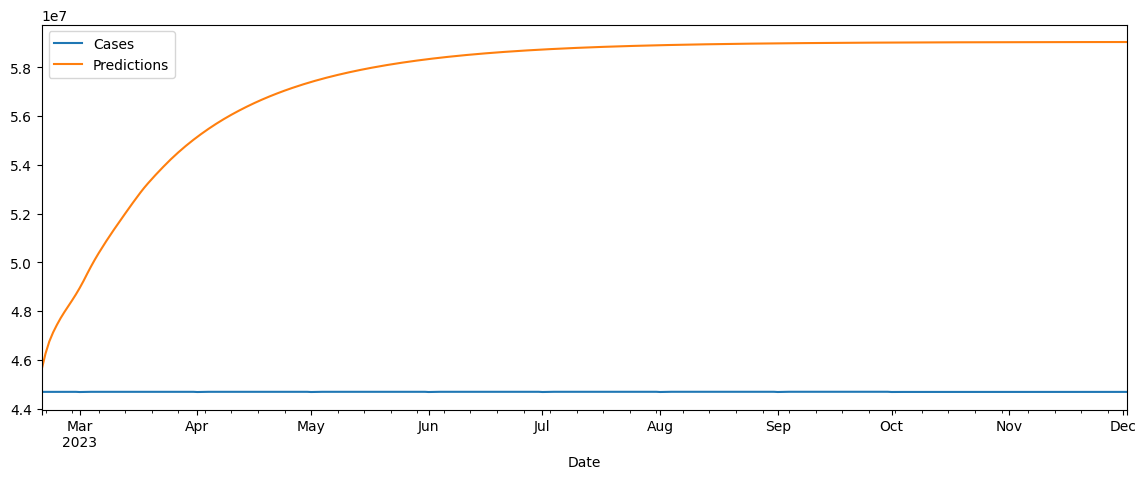

In [208]:
test.plot(figsize=(14,5))

In [209]:
testm=test.resample('M').sum()

C:\Users\sneha\AppData\Local\Temp\ipykernel_24852\1631276972.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  testm=test.resample('M').sum()


<Axes: xlabel='Date'>

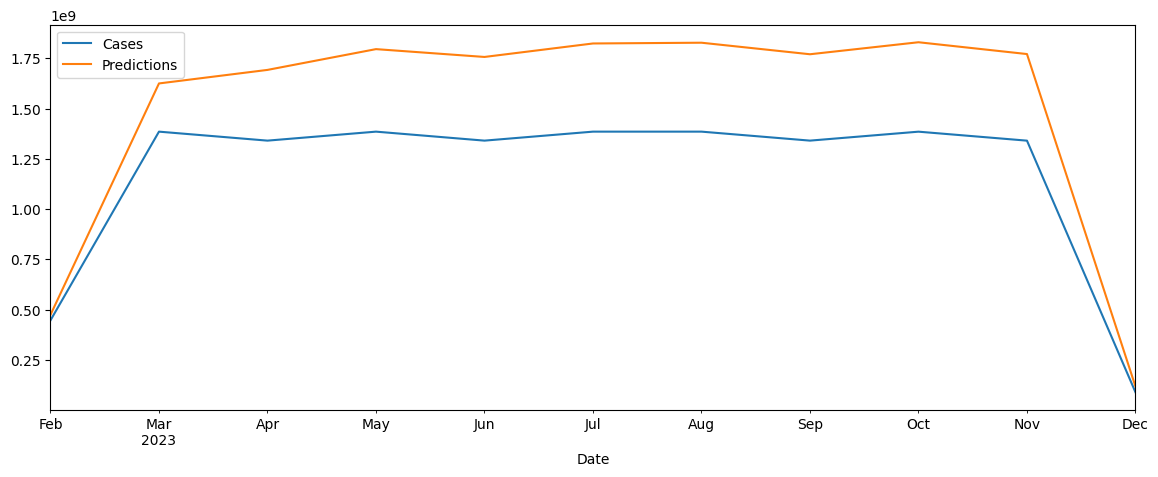

In [210]:
testm.plot(figsize=(14,5))